In [42]:
import read_data
import seaborn as sns
from create_model import *
import keras

direct = "E:\\DRIVE\\Projects\\Ending\\NTI2020\\SS\\task2\\Data\\dataframes"
cols = ['#', 'date', "oC", 'vsu', 'W', '%', 'Hours']
index = ['date']

key = 'oC'

data = read_data.Data()
data.read_from_dir(direct)
data.read(cols, index)

mask = data.data["#"] >0
learn_data = data.data[mask]

In [43]:
# sns.pairplot(learn_data[["oC", 'vsu', 'W', '%', 'Hours']], diag_kind="kde")

In [44]:
train_dataset = learn_data.sample(frac=0.8,random_state=0)
test_dataset = learn_data.drop(train_dataset.index)

In [45]:
train_labels = train_dataset.pop(key)
test_labels = test_dataset.pop(key)
#train_dataset = train_dataset['Hours']
#test_dataset = test_dataset['Hours']
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [46]:
model = build_model(len(train_dataset.keys()))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

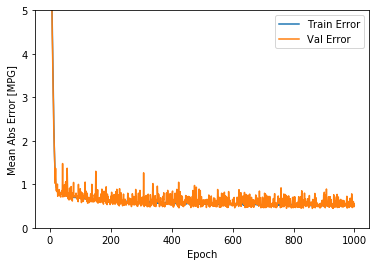

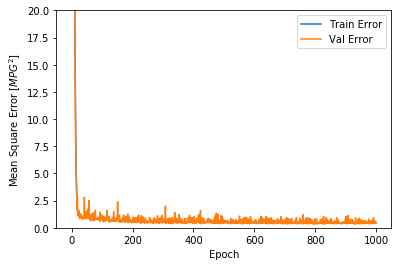

In [48]:
plot_history(history)

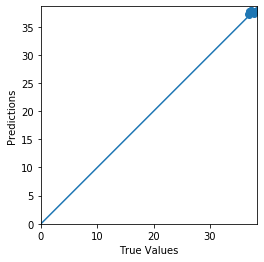

In [49]:
test_predictions = model.predict(normed_test_data[:10])

plt.scatter(test_labels[:10], test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


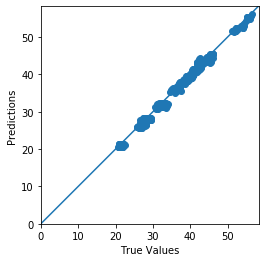

In [50]:
model.save(f"{key}.h5")
del model
model = keras.models.load_model(f"{key}.h5")
model.summary()
test_predictions = model.predict(normed_test_data)

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])